In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(r"C:\Users\POOJA\OneDrive\Desktop\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [24]:
df.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [25]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [26]:
array=df.values

In [34]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [38]:
X




array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [40]:
import scipy.cluster.hierarchy as sch

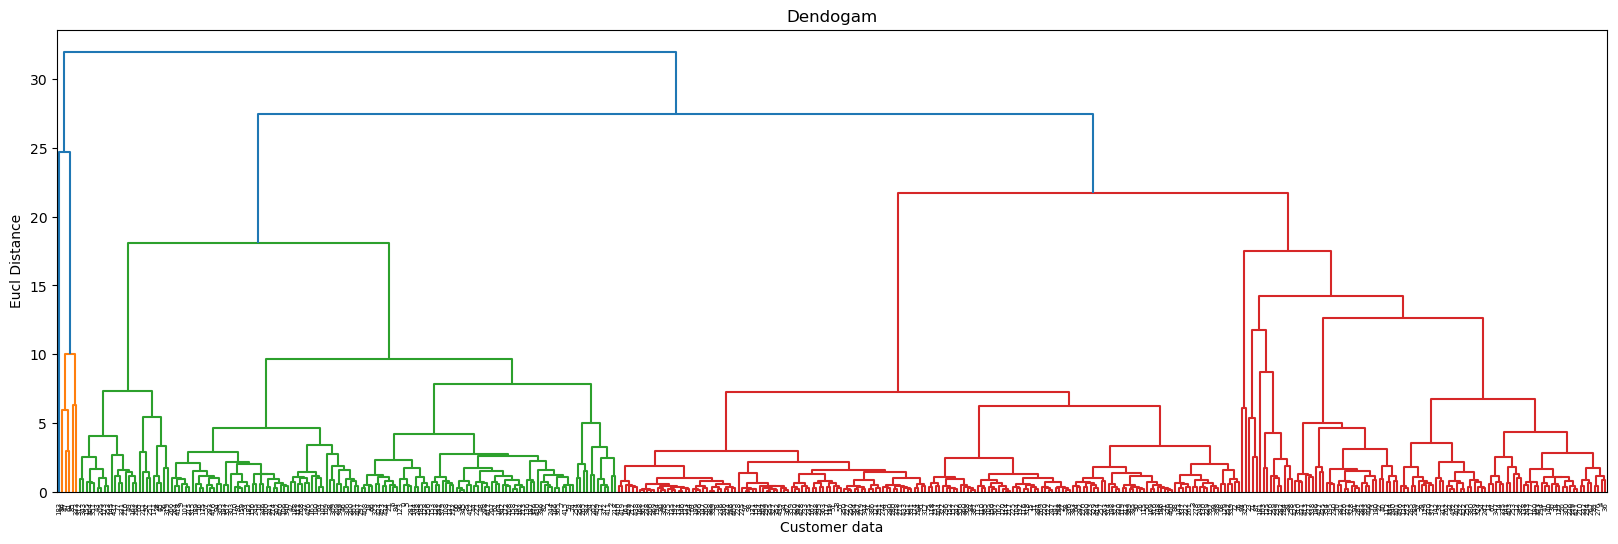

In [42]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogam')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()


In [43]:
len(set(dendo['color_list']))-1

3

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
group = AgglomerativeClustering(n_clusters=3)
group.fit_predict(X)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [46]:
cluster = group.fit_predict(X)
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [47]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [78]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,4
2,2
3,0
4,2
...,...
295,3
296,1
297,2
298,4


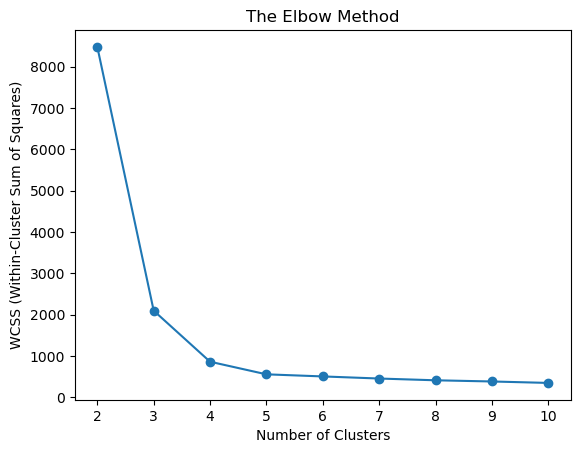

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
import warnings
os.environ["OMP_NUM_THREADS"] = "2"
warnings.filterwarnings("ignore")
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.0, random_state=42)
wcss = []
for n in range(2, 11): 
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

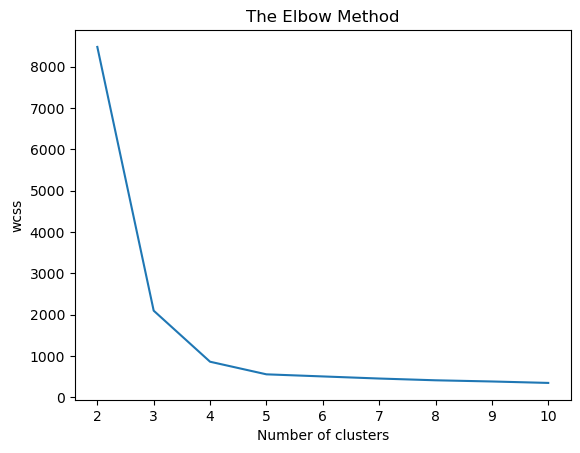

In [83]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [86]:
groups

array([2, 4, 2, 0, 2, 3, 4, 1, 3, 4, 0, 2, 0, 2, 4, 2, 0, 0, 4, 2, 2, 0,
       2, 4, 4, 2, 1, 4, 0, 1, 2, 4, 4, 3, 1, 0, 0, 4, 3, 0, 2, 0, 1, 3,
       4, 3, 2, 1, 4, 1, 3, 4, 1, 3, 2, 3, 0, 2, 3, 1, 2, 3, 4, 4, 1, 0,
       1, 1, 1, 1, 0, 1, 3, 4, 3, 2, 3, 3, 4, 2, 1, 2, 2, 4, 2, 1, 3, 0,
       0, 4, 4, 4, 2, 4, 2, 2, 4, 3, 0, 4, 3, 3, 0, 1, 2, 2, 2, 0, 2, 0,
       3, 4, 0, 0, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 1, 4, 4, 3, 2, 0, 3,
       0, 2, 2, 2, 2, 0, 1, 4, 2, 3, 2, 0, 4, 2, 4, 1, 0, 1, 0, 1, 1, 0,
       2, 4, 1, 3, 2, 0, 3, 3, 4, 0, 2, 3, 4, 0, 0, 4, 1, 2, 0, 0, 2, 0,
       3, 0, 1, 1, 3, 3, 0, 1, 1, 4, 2, 3, 1, 0, 4, 1, 2, 1, 1, 3, 3, 1,
       4, 0, 3, 1, 0, 0, 3, 2, 2, 1, 1, 2, 1, 3, 4, 1, 2, 0, 3, 3, 1, 4,
       3, 3, 4, 3, 4, 0, 3, 4, 3, 4, 3, 4, 0, 1, 4, 0, 0, 0, 4, 2, 3, 0,
       1, 4, 1, 3, 4, 4, 1, 1, 0, 4, 3, 1, 3, 4, 1, 4, 1, 4, 1, 2, 4, 0,
       0, 2, 4, 0, 1, 0, 3, 1, 1, 2, 2, 3, 0, 4, 4, 4, 3, 2, 2, 0, 0, 1,
       1, 1, 4, 0, 3, 0, 1, 3, 2, 3, 1, 2, 4, 2])

In [88]:
silhouette_score(X,groups)

0.6586478247336219

In [90]:
model=KMeans(n_clusters=5, random_state=309)
groups=model.fit_predict(X)

In [92]:
groups

array([2, 4, 2, 0, 2, 3, 4, 1, 3, 4, 0, 2, 0, 2, 4, 2, 0, 0, 4, 2, 2, 0,
       2, 4, 4, 2, 1, 4, 0, 1, 2, 4, 4, 3, 1, 0, 0, 4, 3, 0, 2, 0, 1, 3,
       4, 3, 2, 1, 4, 1, 3, 4, 1, 3, 2, 3, 0, 2, 3, 1, 2, 3, 4, 4, 1, 0,
       1, 1, 1, 1, 0, 1, 3, 4, 3, 2, 3, 3, 4, 2, 1, 2, 2, 4, 2, 1, 3, 0,
       0, 4, 4, 4, 2, 4, 2, 2, 4, 3, 0, 4, 3, 3, 0, 1, 2, 2, 2, 0, 2, 0,
       3, 4, 0, 0, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 2, 1, 4, 4, 3, 2, 0, 3,
       0, 2, 2, 2, 2, 0, 1, 4, 2, 3, 2, 0, 4, 2, 4, 1, 0, 1, 0, 1, 1, 0,
       2, 4, 1, 3, 2, 0, 3, 3, 4, 0, 2, 3, 4, 0, 0, 4, 1, 2, 0, 0, 2, 0,
       3, 0, 1, 1, 3, 3, 0, 1, 1, 4, 2, 3, 1, 0, 4, 1, 2, 1, 1, 3, 3, 1,
       4, 0, 3, 1, 0, 0, 3, 2, 2, 1, 1, 2, 1, 3, 4, 1, 2, 0, 3, 3, 1, 4,
       3, 3, 4, 3, 4, 0, 3, 4, 3, 4, 3, 4, 0, 1, 4, 0, 0, 0, 4, 2, 3, 0,
       1, 4, 1, 3, 4, 4, 1, 1, 0, 4, 3, 1, 3, 4, 1, 4, 1, 4, 1, 2, 4, 0,
       0, 2, 4, 0, 1, 0, 3, 1, 1, 2, 2, 3, 0, 4, 4, 4, 3, 2, 2, 0, 0, 1,
       1, 1, 4, 0, 3, 0, 1, 3, 2, 3, 1, 2, 4, 2])

In [94]:
type(groups)

numpy.ndarray

In [98]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2.0
1,7057,9810,9568,1762,3293,1776,4.0
2,6353,8808,7684,2405,3516,7844,2.0
3,13265,1196,4221,6404,507,1788,0.0
4,22615,5410,7198,3915,1777,5185,2.0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,NaN
436,39228,1431,764,4510,93,2346,NaN
437,14531,15488,30243,437,14841,1867,NaN
438,10290,1981,2232,1038,168,2125,NaN


In [104]:
cust_kmeans_data[cust_kmeans_data['Group']==0]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
3,13265,1196,4221,6404,507,1788,0.0
10,3366,5403,12974,4400,5977,1744,0.0
12,31714,12319,11757,287,3881,2931,0.0
16,1020,8816,12121,134,4508,1080,0.0
17,5876,6157,2933,839,370,4478,0.0
21,5567,871,2010,3383,375,569,0.0
28,4113,20484,25957,1158,8604,5206,0.0
35,688,5491,11091,833,4239,436,0.0
36,29955,4362,5428,1729,862,4626,0.0
39,56159,555,902,10002,212,2916,0.0


In [108]:
cust_kmeans_data[cust_kmeans_data['Group']==1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
7,7579,4956,9426,1669,3321,2566,1.0
26,9898,961,2861,3151,242,833,1.0
29,43088,2100,2609,1200,1107,823,1.0
34,1502,1979,2262,425,483,395,1.0
42,10850,7555,14961,188,6899,46,1.0
47,44466,54259,55571,7782,24171,6465,1.0
49,4967,21412,28921,1798,13583,1163,1.0
52,40721,3916,5876,532,2587,1278,1.0
59,6137,5360,8040,129,3084,1603,1.0
64,4760,1227,3250,3724,1247,1145,1.0


In [110]:
silhouette_score(X,groups)

0.6586478247336219

DBSCAN

In [113]:
from sklearn.cluster import DBSCAN

In [157]:
db_model = DBSCAN(eps=6, min_samples=70)
db_model.fit(X)

DBSCAN(eps=6, min_samples=70)

In [159]:
db_model.labels_

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [161]:
label=db_model.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1, -1,
       -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [163]:
silhouette_score(X,label)

0.5973669752384221

In [170]:
cl=pd.DataFrame(db_model.labels_,columns=['cluster'])
df_cluster=pd.concat(df,cl],axis=1)


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3182802992.py, line 2)

In [172]:
df_cluster[df_cluster['cluster']==-1]

NameError: name 'df_cluster' is not defined